# Retail Sales Forecast

**Aim -** To forecast the weekly sales from a particular department belonging to a store

### **Loading the Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [2]:
feature = pd.read_csv('Features_data_set.csv')
sales = pd.read_csv('sales_data_set.csv')
stores = pd.read_csv('stores_data_set.csv')

In [3]:
feature.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
# Let's explore the "feature" dataframe
# Features dataframe contains additional data related to the store, department, and regional activity for the given dates.
# Store: store number
# Date: week
# Temperature: average temperature in the region
# Fuel_Price: cost of fuel in the region
# MarkDown1-5: anonymized data related to promotional markdowns. 
# CPI: consumer price index
# Unemployment: unemployment rate
# IsHoliday: whether the week is a special holiday week or not

print("The length of the dataset: ", len(feature))
print("length Features in the dataset: ", len(feature.columns))
print('\n')
print("Features in the dataset: ",feature.columns)
print('\n')
print("The number of Stores", len(feature.Store.unique()))
print('\n')
print("The number of uniques Date", feature.Date.unique())

The length of the dataset:  8190
length Features in the dataset:  12


Features in the dataset:  Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')


The number of Stores 45


The number of uniques Date ['05/02/2010' '12/02/2010' '19/02/2010' '26/02/2010' '05/03/2010'
 '12/03/2010' '19/03/2010' '26/03/2010' '02/04/2010' '09/04/2010'
 '16/04/2010' '23/04/2010' '30/04/2010' '07/05/2010' '14/05/2010'
 '21/05/2010' '28/05/2010' '04/06/2010' '11/06/2010' '18/06/2010'
 '25/06/2010' '02/07/2010' '09/07/2010' '16/07/2010' '23/07/2010'
 '30/07/2010' '06/08/2010' '13/08/2010' '20/08/2010' '27/08/2010'
 '03/09/2010' '10/09/2010' '17/09/2010' '24/09/2010' '01/10/2010'
 '08/10/2010' '15/10/2010' '22/10/2010' '29/10/2010' '05/11/2010'
 '12/11/2010' '19/11/2010' '26/11/2010' '03/12/2010' '10/12/2010'
 '17/12/2010' '24/12/2010' '31/12/2010' '07/01/2011' '14/01/201

In [5]:
sales.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [6]:
# Let's explore the "sales" dataframe
# "Sales" dataframe contains historical sales data, which covers 2010-02-05 to 2012-11-01. 
# Store: store number
# Dept: department number
# Date: the week
# Weekly_Sales: sales for the given department in the given store
# IsHoliday: whether the week is a special holiday week

print("The length of the dataset: ", len(sales))
print("length Features in the dataset: ", len(sales.columns))
print('\n')
print("Features in the dataset: ",sales.columns)
print('\n')
print("The number of Stores", len(sales.Store.unique()))
print('\n')
print("The number of Dept", len(sales.Dept.unique()))

The length of the dataset:  421570
length Features in the dataset:  5


Features in the dataset:  Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')


The number of Stores 45


The number of Dept 81


In [7]:
stores.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [8]:
print("The length of the dataset: ", len(stores))
print("length Features in the dataset: ", len(stores.columns))
print('\n')
print("Features in the dataset: ",stores.columns)
print('\n')
print("The number of Stores", len(stores.Store.unique()))
print('\n')
print("The number of Store Type", len(stores.Type.unique()))

The length of the dataset:  45
length Features in the dataset:  3


Features in the dataset:  Index(['Store', 'Type', 'Size'], dtype='object')


The number of Stores 45


The number of Store Type 3


### **Null Value Removal**

In [9]:
feature.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [10]:
feature.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1, inplace=True)

In [11]:
feature.isnull().sum()

Store             0
Date              0
Temperature       0
Fuel_Price        0
CPI             585
Unemployment    585
IsHoliday         0
dtype: int64

In [12]:
feature = feature.fillna(0)

In [13]:
feature.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [14]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   CPI           8190 non-null   float64
 5   Unemployment  8190 non-null   float64
 6   IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(4), int64(1), object(1)
memory usage: 392.0+ KB


**Note** - Date needed to be feature engineered

In [15]:
sales.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [16]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


**Note** - Date column needed to be featured engineered

In [17]:
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [18]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


**Note** - Type column needed to be feature engineered

### **Exploratory Data Analysis**

In [19]:
feature.describe()

,Store,Temperature,Fuel_Price,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000
mean,23.000000,59.356198,3.405992,160.142180,7.267762
std,12.987966,18.678607,0.431337,58.645545,2.708496
min,1.000000,-7.290000,2.472000,0.000000,0.000000
25%,12.000000,45.902500,3.041000,131.051167,6.339000
50%,23.000000,60.710000,3.513000,140.587450,7.574000
75%,34.000000,73.880000,3.743000,212.766994,8.519000
max,45.000000,101.950000,4.468000,228.976456,14.313000


**Note**
- There are about 45 stores in total.
- The average unemployment rate is 7.26
- The average temperature is 59.35
- The average Fuel Price is 3.40

In [20]:
sales.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


**Note**
- There are about 99 Departments 
- The average weekly sales is 15,981
- The weekly sales varies from -4,988 (may be outliers) - 6,93,099

In [21]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


### **Merging all the dataset together**

**Feature Engineering-1** 

In [22]:
feature['Date'] = pd.to_datetime(feature['Date'])
sales['Date'] = pd.to_datetime(sales['Date'])

In [24]:
df = pd.merge(feature, sales, on = ['Store','Date','IsHoliday']) # Common Columns

In [25]:
df.head(5)

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,2010-05-02,42.31,2.572,211.096358,8.106,False,1,24924.50
1,1,2010-05-02,42.31,2.572,211.096358,8.106,False,2,50605.27
2,1,2010-05-02,42.31,2.572,211.096358,8.106,False,3,13740.12
3,1,2010-05-02,42.31,2.572,211.096358,8.106,False,4,39954.04
4,1,2010-05-02,42.31,2.572,211.096358,8.106,False,5,32229.38


In [26]:
df_2 = pd.merge(df, stores, on = ['Store'], how='left' )

In [27]:
df_2.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-05-02,42.31,2.572,211.096358,8.106,False,1,24924.50,A,151315
1,1,2010-05-02,42.31,2.572,211.096358,8.106,False,2,50605.27,A,151315
2,1,2010-05-02,42.31,2.572,211.096358,8.106,False,3,13740.12,A,151315
3,1,2010-05-02,42.31,2.572,211.096358,8.106,False,4,39954.04,A,151315
4,1,2010-05-02,42.31,2.572,211.096358,8.106,False,5,32229.38,A,151315


In [28]:
def month(x):
    return str(x).split('-')[1]

In [29]:
df_2['Month'] = df_2['Date'].apply(month)

In [30]:
df_2.head(5)

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Month
0,1,2010-05-02,42.31,2.572,211.096358,8.106,False,1,24924.50,A,151315,05
1,1,2010-05-02,42.31,2.572,211.096358,8.106,False,2,50605.27,A,151315,05
2,1,2010-05-02,42.31,2.572,211.096358,8.106,False,3,13740.12,A,151315,05
3,1,2010-05-02,42.31,2.572,211.096358,8.106,False,4,39954.04,A,151315,05
4,1,2010-05-02,42.31,2.572,211.096358,8.106,False,5,32229.38,A,151315,05


In [31]:
df_2.describe()

,Store,Temperature,Fuel_Price,CPI,Unemployment,Dept,Weekly_Sales,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,60.090059,3.361027,171.201947,7.960289,44.260317,15981.258123,136727.915739
std,12.785297,18.447931,0.458515,39.159276,1.863296,30.492054,22711.183519,60980.583328
min,1.000000,-2.060000,2.472000,126.064000,3.879000,1.000000,-4988.940000,34875.000000
25%,11.000000,46.680000,2.933000,132.022667,6.891000,18.000000,2079.650000,93638.000000
50%,22.000000,62.090000,3.452000,182.318780,7.866000,37.000000,7612.030000,140167.000000
75%,33.000000,74.280000,3.738000,212.416993,8.572000,74.000000,20205.852500,202505.000000
max,45.000000,100.140000,4.468000,227.232807,14.313000,99.000000,693099.360000,219622.000000


In [32]:
df_2.duplicated().sum()

0

### **EDA & Visualization**

In [33]:
result = pd.pivot_table(df_2, values = 'Weekly_Sales', columns = ['Type'], index = ['Date','Store','Dept'])

In [35]:
result.head(10)

Type                          A   B   C
Date       Store Dept                  
2010-01-10 1     1     20094.19 NaN NaN
                 2     45829.02 NaN NaN
                 3      9775.17 NaN NaN
                 4     34912.45 NaN NaN
                 5     23381.38 NaN NaN
                 6      2876.19 NaN NaN
                 7     16481.79 NaN NaN
                 8     34658.25 NaN NaN
                 9     44977.91 NaN NaN
                 10    29764.24 NaN NaN

In [36]:
result.describe()

Type,A,B,C
count,215478.000000,163495.000000,42597.000000
mean,20099.568043,12237.075977,9519.532538
std,26423.457227,17203.668989,15985.351612
min,-4988.940000,-3924.000000,-379.000000
25%,3315.090000,1927.055000,131.990000
50%,10105.170000,6187.870000,1149.670000
75%,26357.180000,15353.740000,12695.010000
max,474330.100000,693099.360000,112152.350000


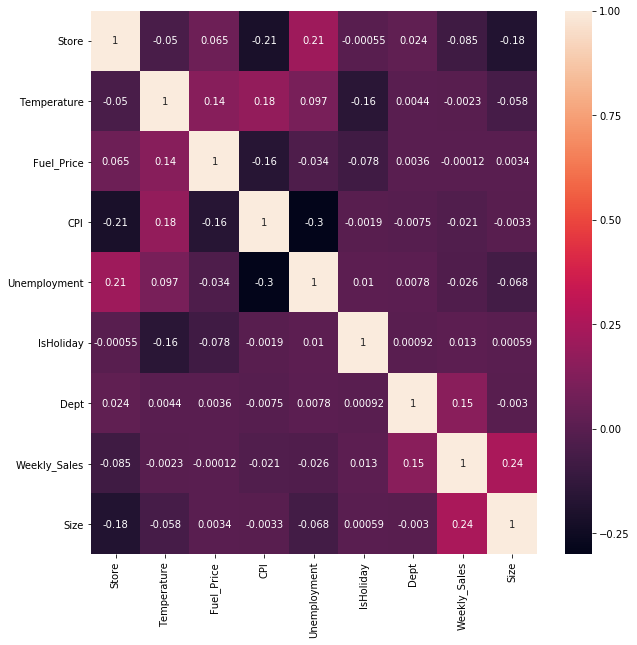

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(df_2.corr(), annot=True)

**Note**
-  Weekly sales has a positive correlation with the size of the store
- Unemployment is showing a positive correlation with the stores

In [38]:
df_2 = df_2.drop(['IsHoliday','Month'], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023D3364B128>,
      dtype=object)

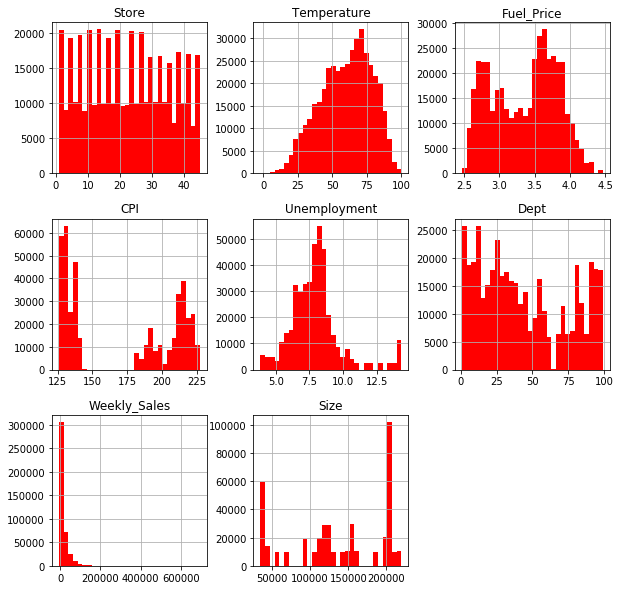

In [39]:
df_2.hist(bins=30, figsize=(10,10), color='r')

**Note**
- The highest temperature range is around 60 - 75 (units is not clear yet)
- The common fuel price is from 3.5-3.7
- The unemployment rate is around 7.5-8

**Feature Engineering - 2**

In [40]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Date          421570 non-null  datetime64[ns]
 2   Temperature   421570 non-null  float64       
 3   Fuel_Price    421570 non-null  float64       
 4   CPI           421570 non-null  float64       
 5   Unemployment  421570 non-null  float64       
 6   Dept          421570 non-null  int64         
 7   Weekly_Sales  421570 non-null  float64       
 8   Type          421570 non-null  object        
 9   Size          421570 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 35.4+ MB


In [41]:
type_dummies = pd.get_dummies(df_2['Type'], drop_first = True)
dept_dummies = pd.get_dummies(df_2['Dept'], drop_first = True)

In [42]:
df_2 = pd.concat([df_2, type_dummies, dept_dummies], axis = 1)
df_2 = df_2.drop(['Type','Dept'], axis=1)

In [43]:
df_2.head(5)

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales,Size,B,C,...,90,91,92,93,94,95,96,97,98,99
0,1,2010-05-02,42.31,2.572,211.096358,8.106,24924.50,151315,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2010-05-02,42.31,2.572,211.096358,8.106,50605.27,151315,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2010-05-02,42.31,2.572,211.096358,8.106,13740.12,151315,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2010-05-02,42.31,2.572,211.096358,8.106,39954.04,151315,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2010-05-02,42.31,2.572,211.096358,8.106,32229.38,151315,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
X = df_2.drop(['Date', 'Weekly_Sales'], axis=1)
Y = df_2.Weekly_Sales

In [45]:
X = np.array(X).astype('float32')
Y = np.array(Y).astype('float32')

Y = Y.reshape(-1,1)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((337256, 88), (84314, 88), (337256, 1), (84314, 1))

In [48]:
import xgboost as xgb

model = xgb.XGBRegressor(learning_rate=0.1, max_depth = 5, n_estimators = 100, objective ='reg:squarederror')

model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
score = model.score(X_test, y_test)
print(score)

0.794189974280681


In [51]:
y_predict = model.predict(X_test)

In [52]:

k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 10251.812 
MSE = 105099660.0 
MAE = 6270.715 
R2 = 0.794189974280681 
Adjusted R2 = 0.7939749397628622


### AWS Built-in XGBoost Algorithm

In [ ]:
# Convert the array into dataframe in a way that target variable is set as the first column and followed by feature columns
# This is because sagemaker built-in algorithm expects the data in this format.

train_data = pd.DataFrame({'Target': y_train[:,0]})
for i in range(X_train.shape[1]):
    train_data[i] = X_train[:,i]


In [ ]:
test_data = pd.DataFrame({'Target':y_test[:,0]})
for i in range(X_val.shape[1]):
    val_data[i] = X_val[:,i]

In [ ]:
# save train_data and validation_data as csv files.

train_data.to_csv('train.csv', header = False, index = False)
val_data.to_csv('validation.csv', header = False, index = False)

In [ ]:
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python
# Boto3 allows Python developer to write software that makes use of services like Amazon S3 and Amazon EC2

import sagemaker
import boto3

# Create a sagemaker session
sagemaker_session = sagemaker.Session()

#S 3 bucket and prefix that we want to use
# default_bucket - creates a Amazon S3 bucket to be used in this session
bucket = 'sagemaker-practical-3'
prefix = 'XGBoost-Regressor'
key = 'XGBoost-Regressor'
#Roles give learning and hosting access to the data
#This is specified while opening the sagemakers instance in "Create an IAM role"
role = sagemaker.get_execution_role()

In [ ]:
print(role)

In [ ]:
# read the data from csv file and then upload the data to s3 bucket
import os
with open('train.csv','rb') as f:
    # The following code uploads the data into S3 bucket to be accessed later for training
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(f)

# Let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

In [ ]:
# read the data from csv file and then upload the data to s3 bucket

with open('validation.csv','rb') as f:
    # The following code uploads the data into S3 bucket to be accessed later for training

    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'validation', key)).upload_fileobj(f)
# Let's print out the validation data location in s3
s3_validation_data = 's3://{}/{}/validation/{}'.format(bucket, prefix, key)
print('uploaded validation data location: {}'.format(s3_validation_data))

In [ ]:
# creates output placeholder in S3 bucket to store the output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artifacts will be uploaded to: {}'.format(output_location))

In [ ]:
# This code is used to get the training container of sagemaker built-in algorithms
# all we have to do is to specify the name of the algorithm, that we want to use

# Let's obtain a reference to the XGBoost container image
# Note that all regression models are named estimators
# You don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session

from sagemaker.amazon.amazon_estimator import get_image_uri

container = get_image_uri(boto3.Session().region_name, 'xgboost','0.90-2') # Latest version of XGboost

In [ ]:
# Specify the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training

# Recall that XGBoost works by combining an ensemble of weak models to generate accurate/robust results. 
# The weak models are randomized to avoid overfitting

# num_round: The number of rounds to run the training.


# Alpha: L1 regularization term on weights. Increasing this value makes models more conservative.

# colsample_by_tree: fraction of features that will be used to train each tree.

# eta: Step size shrinkage used in updates to prevent overfitting. 
# After each boosting step, eta parameter shrinks the feature weights to make the boosting process more conservative.


Xgboost_regressor1 = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count = 1, 
                                       train_instance_type = 'ml.m5.2xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)

#We can tune the hyper-parameters to improve the performance of the model

Xgboost_regressor1.set_hyperparameters(max_depth = 10,
                           objective = 'reg:linear',
                           colsample_bytree = 0.3,
                           alpha = 10,
                           eta = 0.1,
                           num_round = 100
                           )

In [ ]:
# Creating "train", "validation" channels to feed in the model
# Source: https://docs.aws.amazon.com/sagemaker/latest/dg/sagemaker-algo-docker-registry-paths.html

train_input = sagemaker.session.s3_input(s3_data = s3_train_data, content_type='csv',s3_data_type = 'S3Prefix')
valid_input = sagemaker.session.s3_input(s3_data = s3_validation_data, content_type='csv',s3_data_type = 'S3Prefix')


data_channels = {'train': train_input,'validation': valid_input}


Xgboost_regressor1.fit(data_channels)

In [ ]:
# Deploy the model to perform inference 

Xgboost_regressor = Xgboost_regressor1.deploy(initial_instance_count = 1, instance_type = 'ml.m5.2xlarge')

In [ ]:
'''
Content type over-rides the data that will be passed to the deployed model, since the deployed model expects data
in text/csv format, we specify this as content -type.

Serializer accepts a single argument, the input data, and returns a sequence of bytes in the specified content
type

Reference: https://sagemaker.readthedocs.io/en/stable/predictors.html
'''
from sagemaker.predictor import csv_serializer, json_deserializer

Xgboost_regressor.content_type = 'text/csv'
Xgboost_regressor.serializer = csv_serializer
Xgboost_regressor.deserializer = None

In [ ]:
# making prediction

predictions1 = Xgboost_regressor.predict(X_test[0:10000])

In [ ]:
# custom code to convert the values in bytes format to array

def bytes_2_array(x):
    
    # makes entire prediction as string and splits based on ','
    l = str(x).split(',')
    
    # Since the first element contains unwanted characters like (b,',') we remove them
    l[0] = l[0][2:]
    #same-thing as above remove the unwanted last character (')
    l[-1] = l[-1][:-1]
    
    # iterating through the list of strings and converting them into float type
    for i in range(len(l)):
        l[i] = float(l[i])
        
    # converting the list into array
    l = np.array(l).astype('float32')
    
    # reshape one-dimensional array to two-dimensional array
    return l.reshape(-1,1)
    

In [ ]:
predicted_values_1 = bytes_2_array(predictions1)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, predicted_values)),'.3f'))
MSE = mean_squared_error(y_test, predicted_values)
MAE = mean_absolute_error(y_test, predicted_values)
r2 = r2_score(y_test, predicted_values)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

In [ ]:
# Delete the end-point

Xgboost_regressor.delete_endpoint()